In [1]:
import leafmap 
import geopandas as gpd
import pandas as pd

from dotenv import load_dotenv
from arcgis.gis import GIS, ContentManager
from arcgis.apps.survey123 import SurveyManager

import os 

load_dotenv()



True

In [2]:
def normalize_gdf(gdf, epsg=6566):
    multi_poly_gdf = gdf[gdf["geometry"].apply(lambda geom : True if geom.type == "MultiPolygon" else False)]
    normalized_multi_polys = foo(multi_poly_gdf)
    poly_gdf = gdf[gdf["geometry"].apply(lambda geom : True if geom.type != "MultiPolygon" else False)]

    normalized_gdf = gpd.GeoDataFrame(pd.concat([normalized_multi_polys, poly_gdf]))
    normalized_gdf["geometry"] = normalized_gdf["geometry"].set_crs(epsg=epsg)
    return normalized_gdf
    
def foo(multi_poly_gdf):
    gdfs = []
    for index, row_data in multi_poly_gdf.iterrows():
        geometry = row_data["geometry"]

        poly_rows = []
        for poly in geometry.geoms:
            row_data["geometry"] = poly
            poly_rows.append(row_data)

        g = gpd.GeoDataFrame(pd.DataFrame(poly_rows))
        gdfs.append(g)
 
    return gpd.GeoDataFrame(pd.concat(gdfs))


In [15]:
gdf = gpd.read_file("../g11_conserv_areas_naturales_protegidas_marinas_2019.zip")
normalize_gdf(gdf)

,names,mgmt,ownership,year_estab,loc_desig,terr_mar,gis_source,notes,geometry
1,Ext. Marina del Bosque Estatal de Boquerón,Departamento de Recursos Naturales y Ambiental...,Dominio público,1998,Extensión Marina,Marina,DRNA 2015?mayo,None,"MULTIPOLYGON (((121355.765 214771.323, 121350...."
6,Ext. Marina Reserva Natural La Parguera,Departamento de Recursos Naturales y Ambiental...,Dominio público,1986,Extensión Marina,Marina,DRNA 2015?mayo,None,"MULTIPOLYGON (((138385.025 215783.455, 138379...."
21,Ext. Marina RN Corredor Ecológico del Noreste,Departamento de Recursos Naturales y Ambiental...,Dominio público,2015,Extensión Marina,Marina,DRNA 2015?mayo,None,"MULTIPOLYGON (((283381.024 278037.516, 283395...."
0,Ext. Marina Bosque Estatal de Guánica,Departamento de Recursos Naturales y Ambiental...,Dominio público,1985,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((150562.668 212809.719, 150562.676 21..."
2,Ext. Marina R.N. Caño La Boquilla,Departamento de Recursos Naturales y Ambiental...,Dominio público,2002,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((121693.914 243697.073, 101477.601 24..."
3,Ext. Marina R.N. Punta Guaniquilla,Departamento de Recursos Naturales y Ambiental...,Dominio público,2002,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((115317.817 226278.038, 118875.189 22..."
4,Ext. Marina Reserva Natural de Isla de Mona y ...,Departamento de Recursos Naturales y Ambiental...,Dominio público,1986,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((65595.457 237602.784, 65883.519 2368..."
5,Ext. Marina Reserva Natural Hacienda La Esperanza,Departamento de Recursos Naturales y Ambiental...,Dominio público,1987,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((192250.650 271248.616, 192250.644 27..."
7,Ext. Marina R.N. Cueva del Indio,Departamento de Recursos Naturales y Ambiental...,Dominio público,1992,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((178735.446 273008.733, 178732.821 27..."
8,Ext. Marina R.N. Finca Belvedere,Departamento de Recursos Naturales y Ambiental...,Dominio público,2003,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((108017.947 229029.287, 112782.976 22..."


93

In [ ]:
m = leafmap.Map()
# m.add_gdf(reports_gdf)
m.add_gdf(
    multi_poly_gdf.loc[171:171], 
    fill_colors=["blue"],
    style={
        "stroke": True,
        "weight": 2
    }
)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [7]:
gdfs = []
for row in multi_poly_gdf.iterrows():

    index = row[0]
    row_data = row[1]

    geometry = row_data["geometry"]

    poly_rows = []
    for poly in geometry.geoms:
        # print(poly)
        row_data["geometry"] = poly
        # print(type(row_data))
        poly_rows.append(row_data)
        # break 
        # gdf = gpd.DataFrame()
    g = gpd.GeoDataFrame(pd.DataFrame(poly_rows))
    gdfs.append(g)
        # create row from this polygon

    # break
gdf = gpd.GeoDataFrame(pd.concat(gdfs))
gdf

,names,mgmt,ownership,year_estab,loc_desig,terr_mar,gis_source,notes,geometry
1,Ext. Marina del Bosque Estatal de Boquerón,Departamento de Recursos Naturales y Ambiental...,Dominio público,1998,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((121802.492 214659.822, 121799.407 21..."
1,Ext. Marina del Bosque Estatal de Boquerón,Departamento de Recursos Naturales y Ambiental...,Dominio público,1998,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((121802.492 214659.822, 121799.407 21..."
1,Ext. Marina del Bosque Estatal de Boquerón,Departamento de Recursos Naturales y Ambiental...,Dominio público,1998,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((121802.492 214659.822, 121799.407 21..."
1,Ext. Marina del Bosque Estatal de Boquerón,Departamento de Recursos Naturales y Ambiental...,Dominio público,1998,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((121802.492 214659.822, 121799.407 21..."
1,Ext. Marina del Bosque Estatal de Boquerón,Departamento de Recursos Naturales y Ambiental...,Dominio público,1998,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((121802.492 214659.822, 121799.407 21..."
6,Ext. Marina Reserva Natural La Parguera,Departamento de Recursos Naturales y Ambiental...,Dominio público,1986,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((138774.480 215643.563, 138778.628 21..."
6,Ext. Marina Reserva Natural La Parguera,Departamento de Recursos Naturales y Ambiental...,Dominio público,1986,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((138774.480 215643.563, 138778.628 21..."
6,Ext. Marina Reserva Natural La Parguera,Departamento de Recursos Naturales y Ambiental...,Dominio público,1986,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((138774.480 215643.563, 138778.628 21..."
21,Ext. Marina RN Corredor Ecológico del Noreste,Departamento de Recursos Naturales y Ambiental...,Dominio público,2015,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((316076.696 255956.778, 316075.205 25..."
21,Ext. Marina RN Corredor Ecológico del Noreste,Departamento de Recursos Naturales y Ambiental...,Dominio público,2015,Extensión Marina,Marina,DRNA 2015?mayo,None,"POLYGON ((316076.696 255956.778, 316075.205 25..."


In [26]:
m = leafmap.Map()
# m.add_gdf(reports_gdf)
m.add_gdf(clean_gdf)
# m.add_gdf(terrestrial_gdf)
m


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
buff_size = 15
d = reports_gdf["geometry"].to_crs('EPSG:32620').apply(lambda point: point.buffer(buff_size))
# d = reports_gdf["geometry"]
d

0      POLYGON ((255645.864 2028465.039, 255645.792 2...
1      POLYGON ((201805.775 2038769.983, 201805.703 2...
2      POLYGON ((192194.268 2041895.966, 192194.196 2...
3      POLYGON ((194863.399 2041547.862, 194863.327 2...
4      POLYGON ((200565.129 2039881.158, 200565.057 2...
                             ...                        
226    POLYGON ((242014.008 2009228.063, 242013.936 2...
227    POLYGON ((242148.929 2009311.519, 242148.856 2...
228    POLYGON ((59194.540 2040386.525, 59194.468 204...
229    POLYGON ((243433.130 2009409.096, 243433.058 2...
230    POLYGON ((9628233.493 0.000, 9628233.420 -1.47...
Name: geometry, Length: 231, dtype: geometry

In [ ]:
circle_gdf = gpd.GeoDataFrame({"geometry": d})
circle_gdf["geometry"] = circle_gdf["geometry"].to_crs(epsg=6566)
circle_gdf.crs

<Projected CRS: EPSG:6566>
Name: NAD83(2011) / Puerto Rico and Virgin Is.
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Puerto Rico and US Virgin Islands - onshore.
- bounds: (-67.97, 17.62, -64.51, 18.57)
Coordinate Operation:
- name: SPCS83 Puerto Rico & Virgin Islands zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
m = leafmap.Map()
m.add_gdf(reports_gdf)
m.add_gdf(circle_gdf)
m.add_gdf(terrestrial_gdf)
m


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
circle_gdf.crs, terrestrial_gdf.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:6566>
 Name: NAD83(2011) / Puerto Rico and Virgin Is.
 Axis Info [cartesian]:
 - X[east]: Easting (metre)
 - Y[north]: Northing (metre)
 Area of Use:
 - name: Puerto Rico and US Virgin Islands - onshore.
 - bounds: (-67.97, 17.62, -64.51, 18.57)
 Coordinate Operation:
 - name: SPCS83 Puerto Rico & Virgin Islands zone (meters)
 - method: Lambert Conic Conformal (2SP)
 Datum: NAD83 (National Spatial Reference System 2011)
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

In [ ]:
# terrestrial_gdf.index = terrestrial_gdf["fid"]

In [ ]:
# terrestrial_gdf

,fid,names,mgmt,ownership,year_estab,loc_desig,terr_mar,gis_source,notes,elevm_mean,...,elevm_min,elevm_max,elevm_rang,slopedeg_m,slopedeg_0,slopedeg_s,slopedeg_1,slopedeg_2,slopedeg_r,geometry
0,1.0,Bosque del Pueblo de Adjuntas,Co-manejo: DRNA y Taller de Arte y Cultura de ...,terrenos públicos y privados,1995,Bosque Estatal,Terrestre,DRNA 2015?mayo,None,558.766957,...,371.799957,741.147827,369.347870,17.533922,17.312528,7.334721,0.534519,40.269211,39.734692,"MULTIPOLYGON (((171931.543 239919.711, 171932...."
1,2.0,Bosque Estatal de Cambalache,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1943,Bosque Estatal,Terrestre,DRNA 2015?mayo,None,112.626864,...,13.828362,244.522995,230.694633,16.239568,16.034012,8.724222,0.197296,46.099037,45.901742,"MULTIPOLYGON (((182704.616 268740.282, 182713...."
2,3.0,Bosque Estatal de Cerrillos,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1996,Bosque Estatal - Refugio de Vida Silvestre,Terrestre,DRNA 2015?mayo,None,178.073191,...,169.000000,267.647491,98.647491,9.918076,5.291563,11.228263,0.000000,45.743774,45.743774,"POLYGON ((184763.225 229018.053, 184786.694 22..."
3,4.0,Bosque Estatal de Guajataca,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1935,Bosque Estatal,Terrestre,DRNA 2015?mayo,None,253.543880,...,170.458710,344.151703,173.692993,19.688244,19.824059,8.394802,0.133792,44.626770,44.492978,"POLYGON ((143622.354 265244.125, 143632.966 26..."
4,5.0,Bosque Estatal de Guánica,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva de la Biosfera,Terrestre,DRNA 2015?mayo,None,80.675830,...,0.000005,225.325836,225.325831,8.529790,6.675833,6.455994,0.000000,48.201225,48.201225,"MULTIPOLYGON (((153203.575 219732.501, 153561...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,172.0,Zona de Conservación del Carso,"dueños, públicos y privados, siguiendo el Plan...",terrenos públicos y privados,1999,Zonas de conservación en Área Restringida del ...,Terrestre,Junta de Planificación,None,213.637697,...,-3.174264,630.053650,633.227914,18.246900,17.341373,10.749767,0.000000,72.357086,72.357086,"MULTIPOLYGON (((154001.038 212718.634, 154048...."
172,173.0,Reserva Natural Laguna Tortuguero,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1979,Reserva Natural,Terrestre,DRNA 2015?mayo,None,7.993237,...,0.500000,77.152657,76.652657,2.618458,0.723963,4.827123,0.000000,32.353397,32.353397,"POLYGON ((199079.940 271311.144, 199097.608 27..."
173,174.0,Área Natural Protegida Río Sana Muerto,Para la Naturaleza,Para la Naturaleza,2013,Área Natural Protegida,Terrestre,Para la Naturaleza Noviembre 2018,None,301.459375,...,102.845123,488.724304,385.879181,26.519971,28.262918,7.754832,2.536264,40.063263,37.526999,"POLYGON ((200846.756 250265.427, 200903.618 25..."
174,175.0,Área Natural Protegida Ojo de Agua,Para la Naturaleza,Para la Naturaleza,2014,Área Natural Protegida,Terrestre,Para la Naturaleza Noviembre 2018,None,249.156226,...,85.631531,489.354553,403.723022,16.552360,16.358780,7.392978,0.594035,39.740829,39.146794,"POLYGON ((198583.410 227769.791, 198637.568 22..."


In [ ]:
join_gdf = clean_gdf.overlay(circle_gdf, how='intersection')
join_gdf


,fid,names,mgmt,ownership,year_estab,loc_desig,terr_mar,gis_source,notes,elevm_mean,...,elevm_min,elevm_max,elevm_rang,slopedeg_m,slopedeg_0,slopedeg_s,slopedeg_1,slopedeg_2,slopedeg_r,geometry
0,93.0,Bosque Estatal de Piñones,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva Natural,Terrestre,DRNA 2015?mayo,None,0.716853,...,-0.740805,6.902024,7.642829,0.235474,0.023206,0.497372,0.000000,4.923683,4.923683,"POLYGON ((248673.189 268889.506, 248672.164 26..."
1,93.0,Bosque Estatal de Piñones,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva Natural,Terrestre,DRNA 2015?mayo,None,0.716853,...,-0.740805,6.902024,7.642829,0.235474,0.023206,0.497372,0.000000,4.923683,4.923683,"POLYGON ((248673.189 268889.506, 248672.164 26..."
2,93.0,Bosque Estatal de Piñones,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva Natural,Terrestre,DRNA 2015?mayo,None,0.716853,...,-0.740805,6.902024,7.642829,0.235474,0.023206,0.497372,0.000000,4.923683,4.923683,"POLYGON ((248673.189 268889.506, 248672.164 26..."
3,93.0,Bosque Estatal de Piñones,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva Natural,Terrestre,DRNA 2015?mayo,None,0.716853,...,-0.740805,6.902024,7.642829,0.235474,0.023206,0.497372,0.000000,4.923683,4.923683,"POLYGON ((248673.189 268889.506, 248672.164 26..."
4,93.0,Bosque Estatal de Piñones,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva Natural,Terrestre,DRNA 2015?mayo,None,0.716853,...,-0.740805,6.902024,7.642829,0.235474,0.023206,0.497372,0.000000,4.923683,4.923683,"POLYGON ((248673.189 268889.506, 248672.164 26..."
5,93.0,Bosque Estatal de Piñones,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva Natural,Terrestre,DRNA 2015?mayo,None,0.716853,...,-0.740805,6.902024,7.642829,0.235474,0.023206,0.497372,0.000000,4.923683,4.923683,"POLYGON ((248673.189 268889.506, 248672.164 26..."
6,93.0,Bosque Estatal de Piñones,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva Natural,Terrestre,DRNA 2015?mayo,None,0.716853,...,-0.740805,6.902024,7.642829,0.235474,0.023206,0.497372,0.000000,4.923683,4.923683,"POLYGON ((248673.189 268889.506, 248672.164 26..."
7,93.0,Bosque Estatal de Piñones,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva Natural,Terrestre,DRNA 2015?mayo,None,0.716853,...,-0.740805,6.902024,7.642829,0.235474,0.023206,0.497372,0.000000,4.923683,4.923683,"POLYGON ((248673.189 268889.506, 248672.164 26..."
8,93.0,Bosque Estatal de Piñones,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva Natural,Terrestre,DRNA 2015?mayo,None,0.716853,...,-0.740805,6.902024,7.642829,0.235474,0.023206,0.497372,0.000000,4.923683,4.923683,"POLYGON ((248673.189 268889.506, 248672.164 26..."
9,93.0,Bosque Estatal de Piñones,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva Natural,Terrestre,DRNA 2015?mayo,None,0.716853,...,-0.740805,6.902024,7.642829,0.235474,0.023206,0.497372,0.000000,4.923683,4.923683,"POLYGON ((248673.189 268889.506, 248672.164 26..."


In [ ]:
intersecting_gdf = gpd.sjoin(clean_gdf, circle_gdf, how='inner', op='intersects')
non_intersecting = clean_gdf[~clean_gdf.index.isin(intersecting_gdf.index)]

In [ ]:
m = leafmap.Map()

m.add_gdf(
    intersecting_gdf, 
    style={
        
        "opacity": 1,
        "fill": True,               
        "fillOpacity": 1,      
        "fillColor": "green"     
        
    }
)
m.add_gdf(
    circle_gdf, 
    style={
        "stroke": True,
        "weight": 2,
        "color": "red"
    }
)
m


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# Layer update

In [ ]:
username = os.getenv('ARCGIS_USERNAME')
password = os.getenv('ARCGIS_PASSWORD')

gis = GIS(username=username, password=password)
gis.properties.user.username

'AmigxsdelMAR'

In [ ]:
#Create survey manager
sm = SurveyManager(gis)
#Create content manager
cm = ContentManager(gis)

In [ ]:
#Test collection geojsojn
collection = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          -66.28232077421518,
          18.44339642368756
        ],
        "type": "Point"
      }
    }
  ]
}

updated_collection = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          -66.28232077421518,
          18.44339642368756
        ],
        "type": "Point"
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          -66.52840535153031,
          18.228875485286366
        ],
        "type": "Point"
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          -65.91088642966577,
          18.166040467495307
        ],
        "type": "Point"
      }
    }
  ]
}

collection_2 = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          -66.28232077421518,
          18.44339642368756
        ],
        "type": "Point"
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          -66.52840535153031,
          18.228875485286366
        ],
        "type": "Point"
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          -65.91088642966577,
          18.166040467495307
        ],
        "type": "Point"
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          -67.09373873229511,
          18.472427613359415
        ],
        "type": "Point"
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          -67.01255670596356,
          18.046133032320725
        ],
        "type": "Point"
      }
    }
  ]
}

In [ ]:
update_test_gdf = gpd.GeoDataFrame.from_features(collection['features'])
update_test_geojson = update_test_gdf.to_json()

In [ ]:
#Crear layer de prueba

layer_title_name = "update_test"
ARCGIS_FOLDER = "Mapa de Costas-2024"
update_test_geojson_path = "./store/update_test.geojson"

with open(update_test_geojson_path, 'w') as f:
    f.write(update_test_geojson)

item = gis.content.add(
            {
                "title": layer_title_name, 
                "description": "layer-upload test ", 
                "tags": "parcels",
                "type": "GeoJson"
            },
            update_test_geojson_path,
            folder = ARCGIS_FOLDER
        )

layer_item = item.publish()

#Tratar de update features



In [ ]:
from arcgis.features import FeatureLayer, FeatureSet
from arcgis.mapping import WebMap

layer_item

<Item title:"update_test" type:Feature Layer Collection owner:AmigxsdelMAR>

<FeatureLayer url:"https://services8.arcgis.com/uZ4S4cxyqMwmAFH5/arcgis/rest/services/update_test/FeatureServer/0">

In [41]:
item = gis.content.get("dc3e5d7c481647e393cac8fce5ae8194")
item.get_data()
color = [0, 252, 0, 100]
item_data = item.get_data()
# item_data
item_data['operationalLayers'][1]['layerDefinition']['drawingInfo']['renderer']['symbol']['color'] = color
item_data
# item_data
item.update(item_properties={"text": item_data})
# item.
item.get_data()


{'operationalLayers': [{'id': '75f83b7d-c933-4b9b-86cf-ebb1c12f5e60',
   'opacity': 1,
   'title': 'report_layer_points',
   'url': 'https://services8.arcgis.com/uZ4S4cxyqMwmAFH5/arcgis/rest/services/report_layer/FeatureServer/0',
   'visibility': True,
   'itemId': '975d219291e844be8f5c7e9f053da290',
   'layerType': 'ArcGISFeatureLayer',
   'layerDefinition': {'drawingInfo': {'renderer': {'type': 'simple',
      'symbol': {'type': 'esriPMS',
       'angle': 0,
       'xoffset': 0,
       'yoffset': 0,
       'contentType': 'image/png',
       'imageData': 'iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAACXBIWXMAAA7DAAAOwwHHb6hkAAAAGXRFWHRTb2Z0d2FyZQBQYWludC5ORVQgdjMuNS4xTuc4+QAAB3VJREFUeF7tmPlTlEcexnve94U5mANQbgQSbgiHXHINlxpRIBpRI6wHorLERUmIisKCQWM8cqigESVQS1Kx1piNi4mW2YpbcZONrilE140RCTcy3DDAcL/zbJP8CYPDL+9Ufau7uqb7eZ7P+/a8PS8hwkcgIBAQCAgEBAICAYGAQEAgIBAQCAgEBAICAYGAQEAgIBAQCDx/AoowKXFMUhD3lQrioZaQRVRS+fxl

In [ ]:
layer_title_name = "layer-geojson-test"
layers = gis.content.search(layer_title_name)

layers

[<Item title:"layer-geojson-test" type:GeoJson owner:AmigxsdelMAR>,
 <Item title:"layer-geojson-test" type:Feature Layer Collection owner:AmigxsdelMAR>]

In [ ]:
webmap_title_name = 'Updated Test WebMap'

webmap_item_properties = {
    'title':webmap_title_name,
    'snippet': "Denuncias de construcciones en la costa",
    'tags': ["python"],
    'extent': {
        'xmin': -67.35397048193602, 
        'ymin': 17.80754468951328, 
        'xmax': -65.11851750203257, 
        'ymax': 18.568671638862668, 
        'spatialReference': {'wkid': 4326}
    }
}

In [ ]:
wm = WebMap()

wm.add_layer(f)

new_wm_item = wm.save(
    webmap_item_properties, 
    folder=ARCGIS_FOLDER
)

In [ ]:
updated_features = FeatureSet.from_geojson(collection_2)
f = FeatureLayer.fromitem(layer_item)
f.edit_features(adds=updated_features)

{'addResults': [{'objectId': 5,
   'uniqueId': 5,
   'globalId': None,
   'success': True},
  {'objectId': 6, 'uniqueId': 6, 'globalId': None, 'success': True},
  {'objectId': 7, 'uniqueId': 7, 'globalId': None, 'success': True},
  {'objectId': 8, 'uniqueId': 8, 'globalId': None, 'success': True},
  {'objectId': 9, 'uniqueId': 9, 'globalId': None, 'success': True}],
 'updateResults': [],
 'deleteResults': []}

In [8]:
LINE_AOI = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            -66.17372277596654,
            18.467302404377875
          ],
          [
            -66.27039668707306,
            18.48040128240386
          ],
          [
            -66.45524570391392,
            18.48140884696106
          ],
          [
            -66.65284292881329,
            18.49148416677575
          ],
          [
            -66.87587654696246,
            18.489440252885387
          ],
          [
            -67.080945916032,
            18.51766799182691
          ],
          [
            -67.17541089092593,
            18.473318037891772
          ],
          [
            -67.15624991195173,
            18.42091267437405
          ],
          [
            -67.23063822745806,
            18.374556571273658
          ],
          [
            -67.273218729862,
            18.361462711966283
          ],
          [
            -67.23075562071352,
            18.291882653629443
          ],
          [
            -67.19209823376033,
            18.290855572530702
          ],
          [
            -67.15105115021314,
            18.194017098100687
          ],
          [
            -67.19145447386308,
            18.163734609900843
          ],
          [
            -67.19464138357486,
            18.023370011774958
          ],
          [
            -67.15736046848161,
            18.000166164501067
          ],
          [
            -67.21480301068867,
            17.989026574856283
          ],
          [
            -67.19145471926382,
            17.933437262816724
          ],
          [
            -67.0628392517062,
            17.97389177413352
          ],
          [
            -66.9449767531727,
            17.932433853081676
          ],
          [
            -66.73887308224805,
            17.986003340675055
          ],
          [
            -66.55616901770678,
            17.966788414632802
          ],
          [
            -66.38300590777938,
            17.942536085661274
          ],
          [
            -66.3203273245441,
            17.97386272797442
          ],
          [
            -66.24490027095703,
            17.93545872373126
          ],
          [
            -66.20241185287801,
            17.95972332071078
          ],
          [
            -66.14291460649329,
            17.93545872373126
          ],
          [
            -66.07708688384919,
            17.970865177577082
          ],
          [
            -66.04518831980793,
            17.95365957542333
          ],
          [
            -66.0101371047395,
            17.979936877226365
          ],
          [
            -65.97615916156661,
            17.962769980041344
          ],
          [
            -65.83167517446795,
            18.0213617377175
          ],
          [
            -65.8284672296407,
            18.05771704575035
          ],
          [
            -65.78596478086914,
            18.098110407401464
          ],
          [
            -65.74666444433475,
            18.17181056141115
          ],
          [
            -65.69781562158953,
            18.18190582055547
          ],
          [
            -65.6446973690304,
            18.207135578496974
          ],
          [
            -65.61281962956997,
            18.239424510421486
          ],
          [
            -65.62448747880114,
            18.368524869946626
          ],
          [
            -65.7179838466767,
            18.382637610150496
          ],
          [
            -65.7828012760855,
            18.406827204088174
          ],
          [
            -65.89538690003369,
            18.441101648420144
          ],
          [
            -65.99524786315469,
            18.453194801832012
          ],
          [
            -66.08554849149523,
            18.44412450583191
          ],
          [
            -66.19072038671044,
            18.456217957132495
          ],
          [
            -66.17478512663789,
            18.467302404377875
          ]
        ],
        "type": "LineString"
      }
    }
  ]
}

In [2]:
marine_gdf = gpd.read_file("../static/g11_conserv_areas_naturales_protegidas_marinas_2019.zip").explode("geometry")
land_gdf = gpd.read_file("../static/g11_conserv_areas_naturales_protegidas_terrestres_2019(1).zip").explode("geometry")
# priority_gdf = gpd.read_file("../g11_conserv_areas_prioridad_conservacion_2008.zip")
critical_cons_gdf =  gpd.read_file("../static/g01_conserv_critical_wildlife_areas.zip")

DriverError: '/vsizip/../g11_conserv_areas_naturales_protegidas_marinas_2019.zip' does not exist in the file system, and is not recognized as a supported dataset name.

In [21]:
g = gpd.read_file("../g11_conserv_areas_naturales_protegidas_terrestres_2019(1).zip")


In [22]:
g["geometry"]

0      MULTIPOLYGON (((171931.543 239919.711, 171932....
1      MULTIPOLYGON (((182704.616 268740.282, 182713....
2      POLYGON ((184763.225 229018.053, 184786.694 22...
3      POLYGON ((143622.354 265244.125, 143632.966 26...
4      MULTIPOLYGON (((153203.575 219732.501, 153561....
                             ...                        
171    MULTIPOLYGON (((154001.038 212718.634, 154048....
172    POLYGON ((199079.940 271311.144, 199097.608 27...
173    POLYGON ((200846.756 250265.427, 200903.618 25...
174    POLYGON ((198583.410 227769.791, 198637.568 22...
175    MULTIPOLYGON (((39570.057 237091.568, 39577.47...
Name: geometry, Length: 176, dtype: geometry

In [24]:
land_gdf = g.explode("geometry")

In [29]:
land_gdf

fid                                     names  \
0   0    1.0             Bosque del Pueblo de Adjuntas   
    1    1.0             Bosque del Pueblo de Adjuntas   
1   0    2.0              Bosque Estatal de Cambalache   
    1    2.0              Bosque Estatal de Cambalache   
    2    2.0              Bosque Estatal de Cambalache   
...      ...                                       ...   
175 4  176.0  Reserva Natural de Isla de Mona y Monito   
    5  176.0  Reserva Natural de Isla de Mona y Monito   
    6  176.0  Reserva Natural de Isla de Mona y Monito   
    7  176.0  Reserva Natural de Isla de Mona y Monito   
    8  176.0  Reserva Natural de Isla de Mona y Monito   

                                                    mgmt  \
0   0  Co-manejo: DRNA y Taller de Arte y Cultura de ...   
    1  Co-manejo: DRNA y Taller de Arte y Cultura de ...   
1   0  Departamento de Recursos Naturales y Ambiental...   
    1  Departamento de Recursos Naturales y Ambiental...   
    2  Departamento de Recursos Naturales y Ambiental...   
...                                                  ...   
175 4  Departamento de Recursos Naturales y Ambiental...   
    5  Departamento de Recursos Naturales y Ambiental...   
    6  Departamento de Recursos Naturales y Ambiental...   
    7  Departamento de Recursos Naturales y Ambiental...   
    8  Departamento de Recursos Naturales y Ambiental...   

                          ownership year_estab        loc_desig   terr_mar  \
0   0  terrenos públicos y privados       1995   Bosque Estatal  Terrestre   
    1  terrenos públicos y privados       1995   Bosque Estatal  Terrestre   
1   0  terrenos públicos y privados       1943   Bosque Estatal  Terrestre   
    1  terrenos públicos y privados       1943   Bosque Estatal  Terrestre   
    2  terrenos públicos y privados       1943   Bosque Estatal  Terrestre   
...                             ...        ...              ...        ...   
175 4               Dominio público       1986  Reserva Natural  Terrestre   
    5               Dominio público       1986  Reserva Natural  Terrestre   
    6               Dominio público       1986  Reserva Natural  Terrestre   
    7               Dominio público       1986  Reserva Natural  Terrestre   
    8               Dominio público       1986  Reserva Natural  Terrestre   

           gis_source notes  elevm_mean  ...   elevm_min   elevm_max  \
0   0  DRNA 2015?mayo  None  558.766957  ...  371.799957  741.147827   
    1  DRNA 2015?mayo  None  558.766957  ...  371.799957  741.147827   
1   0  DRNA 2015?mayo  None  112.626864  ...   13.828362  244.522995   
    1  DRNA 2015?mayo  None  112.626864  ...   13.828362  244.522995   
    2  DRNA 2015?mayo  None  112.626864  ...   13.828362  244.522995   
...               ...   ...         ...  ...         ...         ...   
175 4  DRNA 2015?mayo  None         NaN  ...         NaN         NaN   
    5  DRNA 2015?mayo  None         NaN  ...         NaN         NaN   
    6  DRNA 2015?mayo  None         NaN  ...         NaN         NaN   
    7  DRNA 2015?mayo  None         NaN  ...         NaN         NaN   
    8  DRNA 2015?mayo  None         NaN  ...         NaN         NaN   

       elevm_rang  slopedeg_m  slopedeg_0  slopedeg_s  slopedeg_1  slopedeg_2  \
0   0  369.347870   17.533922   17.312528    7.334721    0.534519   40.269211   
    1  369.347870   17.533922   17.312528    7.334721    0.534519   40.269211   
1   0  230.694633   16.239568   16.034012    8.724222    0.197296   46.099037   
    1  230.694633   16.239568   16.034012    8.724222    0.197296   46.099037   
    2  230.694633   16.239568   16.034012    8.724222    0.197296   46.099037   
...           ...         ...         ...         ...         ...         ...   
175 4         NaN         NaN         NaN         NaN         NaN         NaN   
    5         NaN         NaN         NaN         NaN         NaN         NaN   
    6         NaN         NaN         NaN         NaN       

In [4]:
marine_gdf["file"] = ["reserva_marina"]*len(marine_gdf)
land_gdf["file"] =  ["reserva_terrestre"]*len(land_gdf)
# priority_gdf["file"] =  ["prioridad"]*len(priority_gdf)
critical_cons_gdf["file"] = ["critical"]*len(critical_cons_gdf)


In [31]:
marine_gdf.columns

Index(['names', 'mgmt', 'ownership', 'year_estab', 'loc_desig', 'terr_mar',
       'gis_source', 'notes', 'geometry', 'file'],
      dtype='object')

In [32]:
land_gdf.columns

Index(['fid', 'names', 'mgmt', 'ownership', 'year_estab', 'loc_desig',
       'terr_mar', 'gis_source', 'notes', 'elevm_mean', 'elevm_medi',
       'elevm_stde', 'elevm_min', 'elevm_max', 'elevm_rang', 'slopedeg_m',
       'slopedeg_0', 'slopedeg_s', 'slopedeg_1', 'slopedeg_2', 'slopedeg_r',
       'geometry', 'file'],
      dtype='object')

In [33]:
priority_gdf[priority_gdf["geometry"].type != "Polygon"]

,nombre,geometry,file


In [34]:
critical_cons_gdf[critical_cons_gdf["geometry"].type != "Polygon"]

,cwa,bird_speci,reptiles_s,amphibians,mammals_sp,v_u__speci,e_n__speci,c_r_,d_d__speci,l_r__speci,total_list,geometry,file


In [14]:
gdf = gpd.GeoDataFrame(pd.concat([land_gdf, marine_gdf])).reset_index()
gdf["file"]

0       reserva_terrestre
1       reserva_terrestre
2       reserva_terrestre
3       reserva_terrestre
4       reserva_terrestre
              ...        
1905       reserva_marina
1906       reserva_marina
1907       reserva_marina
1908       reserva_marina
1909       reserva_marina
Name: file, Length: 1910, dtype: object

In [15]:
from shapely.geometry import shape
LINE_AOI

geom = [shape(LINE_AOI["features"][0]["geometry"])]
line_gdf = gpd.GeoDataFrame({'geometry':geom}, crs="4326")
line_gdf = line_gdf.to_crs(6566)

In [16]:
buffer = line_gdf.buffer(200)
# line_gdf["geometry"] = buffer
# 
buff_gdf = gpd.GeoDataFrame({"geometry": buffer})
buff_gdf

,geometry
0,"POLYGON ((227379.368 269992.339, 226155.562 26..."


In [77]:
m = leafmap.Map()
m.add_gdf(buff_gdf)
# m.add_gdf(
#     multi_poly_gdf.loc[171:171], 
#     fill_colors=["blue"],
#     style={
#         "stroke": True,
#         "weight": 2
#     }
# )
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [17]:
join_gdf = gpd.sjoin(gdf,buff_gdf, op='intersects')
join_gdf['geometry']

33      POLYGON ((155732.458 216981.155, 155748.031 21...
34      POLYGON ((167889.529 216558.947, 167888.990 21...
38      POLYGON ((170563.789 216487.031, 170584.070 21...
46      POLYGON ((145030.937 211083.676, 145034.639 21...
53      POLYGON ((153439.414 213167.441, 153439.242 21...
                              ...                        
1902    POLYGON ((263482.389 219891.144, 263483.042 21...
1903    POLYGON ((283381.024 278037.516, 283395.811 26...
1905    POLYGON ((244746.652 268613.124, 245036.741 26...
1908    POLYGON ((223507.716 270100.276, 223503.560 27...
1909    POLYGON ((199999.948 212912.798, 199999.998 20...
Name: geometry, Length: 194, dtype: geometry

In [18]:
# join_gdf = join_gdf.drop(columns=["index"])

KeyError: "['index'] not found in axis"

In [19]:
join_gdf.to_file("../reservas")

In [178]:
join_gdf = join_gdf.drop(columns=['notes', 'elevm_mean', 'elevm_medi',
       'elevm_stde', 'elevm_min', 'elevm_max', 'elevm_rang', 'slopedeg_m',
       'slopedeg_0', 'slopedeg_s', 'slopedeg_1', 'slopedeg_2', 'slopedeg_r',
       'geometry', 'nombre', 'cwa', 'bird_speci', 'reptiles_s',
       'amphibians', 'mammals_sp', 'v_u__speci', 'e_n__speci', 'c_r_',
       'd_d__speci', 'l_r__speci', 'total_list', 'index_right'
       ])

In [183]:
join_gdf["geometry"]

246     POLYGON ((119761.013 212371.227, 119760.941 21...
247     POLYGON ((119761.013 212371.227, 119760.941 21...
248     POLYGON ((119761.013 212371.227, 119760.941 21...
249     POLYGON ((119761.013 212371.227, 119760.941 21...
250     POLYGON ((119761.013 212371.227, 119760.941 21...
                              ...                        
2725    POLYGON ((272235.651 237277.089, 272260.358 23...
2729    POLYGON ((158664.151 215628.364, 159860.843 21...
2737    POLYGON ((189470.895 271728.382, 189495.113 27...
2742    POLYGON ((204431.847 271947.902, 204553.310 27...
2750    POLYGON ((257978.258 266514.336, 257621.459 26...
Name: geometry, Length: 336, dtype: geometry

In [184]:
join_gdf[].to_file("../reservas")

In [47]:
m = leafmap.Map()
m.add_gdf(land_gdf)
m.add_gdf(marine_gdf)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [113]:
OUT_POLY = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              -66.1101967289351,
              18.49178812611997
            ],
            [
              -66.53746611029356,
              18.53761557930298
            ],
            [
              -66.83951187614474,
              18.533797214479094
            ],
            [
              -67.16974858014143,
              18.527114870763924
            ],
            [
              -67.20599407204355,
              18.451681760717562
            ],
            [
              -67.30466235555465,
              18.365704916797768
            ],
            [
              -67.23217011618101,
              18.277773697756814
            ],
            [
              -67.21203498736057,
              18.164925928150268
            ],
            [
              -67.24727366004247,
              17.98594242006719
            ],
            [
              -67.21002134892098,
              17.91793843938271
            ],
            [
              -66.93112833548291,
              17.915075554494067
            ],
            [
              -66.58742903897905,
              17.921768891623984
            ],
            [
              -66.26424006951964,
              17.90644077445984
            ],
            [
              -66.03669892591147,
              17.91602100303527
            ],
            [
              -65.7910350363531,
              17.975406852323317
            ],
            [
              -65.60578333668681,
              18.141965492754068
            ],
            [
              -65.54033705069708,
              18.29115553272652
            ],
            [
              -65.57859618103794,
              18.39818865492893
            ],
            [
              -65.87862830844949,
              18.470780440970927
            ],
            [
              -66.1101967289351,
              18.49178812611997
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

In [105]:
IN_POLY = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [[
          [
            -66.15926989786786,
            18.44213062194308
          ],
          [
            -66.10823572984158,
            18.412607664477946
          ],
          [
            -66.04908821700707,
            18.422177553162754
          ],
          [
            -66.01976291805742,
            18.40429782811772
          ],
          [
            -65.87127849292956,
            18.394314271243914
          ],
          [
            -65.77891758440009,
            18.36124980948516
          ],
          [
            -65.70299052923764,
            18.34186778060625
          ],
          [
            -65.65180450769562,
            18.32343102691152
          ],
          [
            -65.65447887155291,
            18.289717124662047
          ],
          [
            -65.65774060325234,
            18.241453397093707
          ],
          [
            -65.7026663650388,
            18.209345615362835
          ],
          [
            -65.77280897537243,
            18.187907322635354
          ],
          [
            -65.80545534152897,
            18.111728096119023
          ],
          [
            -65.85880935267028,
            18.036187099375667
          ],
          [
            -65.91331173600861,
            18.006149092300006
          ],
          [
            -65.9857957203984,
            17.996263002172597
          ],
          [
            -66.04518110638735,
            17.9878021852077
          ],
          [
            -66.10541562895365,
            17.985304503349127
          ],
          [
            -66.14583270768192,
            17.96653729739046
          ],
          [
            -66.20296963734614,
            17.98397610155601
          ],
          [
            -66.25481636890555,
            17.96231115871717
          ],
          [
            -66.30426265582034,
            17.990053897584886
          ],
          [
            -66.40117841537851,
            17.97408032166024
          ],
          [
            -66.4423717146971,
            18.004485410778102
          ],
          [
            -66.50834382906815,
            18.0124040999668
          ],
          [
            -66.57610085621546,
            18.01698562316072
          ],
          [
            -66.611436794112,
            17.978565875951972
          ],
          [
            -66.6494798626716,
            17.99187378680415
          ],
          [
            -66.7071398079556,
            18.002394394102282
          ],
          [
            -66.77655504352298,
            18.014294042513143
          ],
          [
            -66.81532056904348,
            17.97828317155121
          ],
          [
            -66.86609905756626,
            18.00652708130363
          ],
          [
            -66.92146764320329,
            17.98598495571565
          ],
          [
            -66.96690990891864,
            17.98743537368209
          ],
          [
            -67.05904706916458,
            17.998658296355956
          ],
          [
            -67.13145117847114,
            17.984685627693025
          ],
          [
            -67.15225932892571,
            18.019704144003484
          ],
          [
            -67.17412410015535,
            18.065856440904398
          ],
          [
            -67.15857586964421,
            18.122959816660355
          ],
          [
            -67.15028017598343,
            18.175918714502174
          ],
          [
            -67.13415633948325,
            18.208586455787398
          ],
          [
            -67.15060893099101,
            18.258784260463102
          ],
          [
            -67.20198076078216,
            18.330699918462656
          ],
          [
            -67.16539515882744,
            18.384825281706227
          ],
          [
            -67.12076633777075,
            18.421958567983737
          ],
          [
            -67.12601630933774,
            18.469735916032747
          ],
          [
            -67.07531053711716,
            18.501293292662254
          ],
          [
            -67.00733060263694,
            18.491760472703675
          ],
          [
            -66.94757879238989,
            18.465599268237483
          ],
          [
            -66.87307276270505,
            18.46726709217303
          ],
          [
            -66.69807327080188,
            18.456085928169955
          ],
          [
            -66.59648177995749,
            18.430045904656367
          ],
          [
            -66.52318488314741,
            18.443710944176445
          ],
          [
            -66.43553783824309,
            18.436536665329157
          ],
          [
            -66.38427469751522,
            18.452265000800153
          ],
          [
            -66.27978588084433,
            18.441038601066808
          ],
          [
            -66.15773197766657,
            18.428792510124566
          ],
          [
            -66.15904725303324,
            18.441890624003634
          ],[
            -66.15926989786786,
            18.44213062194308
          ]
        ]],
        "type": "Polygon"
      }
    }
  ]
}

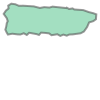

In [124]:
from shapely.geometry import LineString, Polygon
import shapely
# out_poly = Polygon(OUT_LINE)
in_shape = shape(IN_POLY["features"][0]["geometry"])
out_shape = shape(OUT_POLY["features"][0]["geometry"])
# in_poly = shapely.polygonize([in_l])
in_shape

In [148]:
out_gdf = gpd.GeoDataFrame({"geometry": [out_shape]})
in_gdf = gpd.GeoDataFrame({"geometry": [in_shape]})

In [167]:
diff = shapely.difference(out_shape, in_shape)
r = gpd.GeoDataFrame({"geometry": [diff]}, crs=4236)
# r
r = r.to_crs(epsg=6566)

In [168]:
m = leafmap.Map()
m.add_gdf(r)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [169]:
join_gdf = gpd.sjoin(gdf,r, op='intersects')
join_gdf

,index,fid,names,mgmt,ownership,year_estab,loc_desig,terr_mar,gis_source,notes,...,reptiles_s,amphibians,mammals_sp,v_u__speci,e_n__speci,c_r_,d_d__speci,l_r__speci,total_list,index_right
30,4,5.0,Bosque Estatal de Guánica,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva de la Biosfera,Terrestre,DRNA 2015?mayo,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
31,4,5.0,Bosque Estatal de Guánica,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva de la Biosfera,Terrestre,DRNA 2015?mayo,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
32,4,5.0,Bosque Estatal de Guánica,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva de la Biosfera,Terrestre,DRNA 2015?mayo,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
33,4,5.0,Bosque Estatal de Guánica,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva de la Biosfera,Terrestre,DRNA 2015?mayo,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
34,4,5.0,Bosque Estatal de Guánica,Departamento de Recursos Naturales y Ambiental...,terrenos públicos y privados,1919,Bosque Estatal - Reserva de la Biosfera,Terrestre,DRNA 2015?mayo,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,None,Brown pelican Pelecanus occidentalis: C2(a); P...,None,None,None,2.0,0
2737,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,White cheeked pintail Anas bahamensis: C2(a); ...,Brown pelican Pelecanus occidentalis: C2(a); M...,West Indian whistling duck Dendrocygna arborea...,Tachybaptus dominicus; Sterna antillarum; Pata...,None,15.0,0
2742,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,7.0,2.0,Ruddy duck Oxyura jamaicensis: D1 and D2; Whit...,Brown pelican Pelecanus occidentalis: C2(a)\n,Peregrine falcon Falco peregrinus: D; West Ind...,Tachybaptus dominicus; Patagioenas leucocephal...,Mangrove root crab Goniopsis cruentata: (ca); ...,15.0,0
2749,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.0,0.0,"Fulica caribaea: A1(a,b,c); D; Ruddy duck Oxyu...",Pelecanus occidentalis: C2(a); Puerto Rican Se...,West Indian whistling duck Dendrocygna arborea...,Tachybaptus dominicus; Geotrygon chrysia; Pata...,None,11.0,0


In [173]:
m = leafmap.Map()
m.add_gdf(join_gdf.iloc[0:100])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
join_gdf.iloc[]